In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('../dataset/subtitles_dataset_tokenized.csv')
crew_df = pd.read_csv('../dataset/crew.tsv', sep='\t')

In [2]:
crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [3]:
# merge datasets
crew_df['IMDB_ID'] = crew_df.tconst.apply(lambda x: int(x.replace('tt', '')))
df = df.merge(right=crew_df, on='IMDB_ID', how='outer')
#df = df.drop(['directors_x', 'writers_x', 'directors_y', 'writers_y'], axis=1)
df = df.drop('tconst', axis=1)
df = df.replace(r'\N', np.nan)

In [4]:
df.dropna(inplace=True)
df.shape

(18102, 11)

In [5]:
df.head()

,Unnamed: 0,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers
79,79.0,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,nm0000122,"nm0117018,nm0000122,nm1176713"
80,80.0,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,6548,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
82,82.0,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",6684,"Comedy,Short",1916.0,English,untokenisiert,24,nm0000122,"nm0000122,nm0117018,nm1176713"
85,85.0,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,7613,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"
86,86.0,6564950.xml,Die Heilquelle Die Gesundheit Frühling La moll...,7832,"Comedy,Short",1917.0,English,untokenisiert,24,nm0000122,"nm0117018,nm0000122,nm1176713"


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import re

In [57]:
df_split, remove = train_test_split(df, test_size=0.95, random_state=42)

tfidf = TfidfVectorizer(max_features=10000)
#X = tfidf.fit_transform(df_split.text)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_split.text)

In [58]:
X.shape

(905, 129571)

(905, 11)

In [61]:
X.toarray()


array([[2, 4, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende
Start
Ende


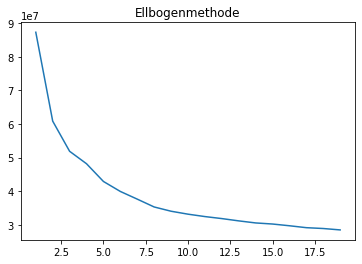

In [65]:
metric_inertia = []
metric_silhouette = []
for n in range(1, 20):
    print("Start")
    model = KMeans(n_clusters=n)
    model.fit(X)
    metric_inertia.append(model.inertia_)
    if n > 1:  #silhouette_score needs at least 2 cluster to work
        metric_silhouette.append(silhouette_score(X, model.labels_))
    print("Ende")

plt.title('Ellbogenmethode')    
plt.plot(range(1,20), metric_inertia);

In [30]:
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
X.values

AttributeError: values not found

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer(stop_words=get_stop_words('de'), max_features=10000)
X_data = tfidf.fit_transform(df.text)

In [10]:
model.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,

In [ ]:
pca = PCA(n_components=2)
pca.fit(X.todense())
X_tf = pca.transform(X.todense())
df['pca2d_1'] = X_tf[:,0]
df['pca2d_2'] = X_tf[:,1]
df['kmeans'] = model.labels_


plt.figure(figsize=(12,8))
for d in df.iterrows():
    x = d[1].pca2d_1
    y = d[1].pca2d_2    
    plt.plot(x, y, 'o', markersize=15)
    plt.plot(x, y, color='white', markersize=12)
